In [ ]:
pip install emoji==1.7

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.4/175.4 KB 13.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171046 sha256=743b700f1b60cdf562c97525c6c45bc971d67d0e4edfe543a0b9a36c3485fbdc
  Stored in directory: /root/.cache/pip/wheels/5e/8c/80/c3646df8201ba6f5070297fe3779a4b70265d0bfd961c15302
Successfully built emoji


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import regex
import pandas as pd
import numpy as np
import emoji
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import re
from wordcloud import WordCloud,STOPWORDS
from PIL import Image
from textblob import TextBlob
import warnings
warnings.filterwarnings("ignore")
#import advertools as adv

In [ ]:
def date_time(s):
    pattern = '^([0-9]+)(\/)([0-9]+)(\/)([0-9]+), ([0-9]+):([0-9]+)[ ]?(AM|PM|am|pm)? -'
    result = regex.match(pattern, s)
    if result:
        return True
    return False

def find_author(s):
    s = s.split(":")
    if len(s)==2:
        return True
    else:
        return False

def getDatapoint(line):
    splitline = line.split(' - ')
    dateTime = splitline[0]
    date, time = dateTime.split(", ")
    message = " ".join(splitline[1:])
    if find_author(message):
        splitmessage = message.split(": ")
        author = splitmessage[0]
        message = " ".join(splitmessage[1:])
    else:
        author= None
    return date, time, author, message

In [ ]:
data = []
conversation = '/content/drive/MyDrive/Internship /IPL/chat/WhatsApp Chat with IPL.txt'
with open(conversation, encoding="utf-8") as fp:
    fp.readline()
    messageBuffer = []
    date, time, author = None, None, None
    while True:
        line = fp.readline()
        if not line:
            break
        line = line.strip()
        if date_time(line):
            if len(messageBuffer) > 0:
                data.append([date, time, author, ' '.join(messageBuffer)])
            messageBuffer.clear()
            date, time, author, message = getDatapoint(line)
            messageBuffer.append(message)
        else:
            messageBuffer.append(line)

In [ ]:
df = pd.DataFrame(data, columns=["Date", 'Time', 'Author', 'Message'])
df['Date'] = pd.to_datetime(df['Date'])



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     199 non-null    datetime64[ns]
 1   Time     199 non-null    object        
 2   Author   196 non-null    object        
 3   Message  199 non-null    object        
dtypes: datetime64[ns](1), object(3)
memory usage: 6.3+ KB


In [ ]:
df


,Date,Time,Author,Message
0,2022-12-26,19:19,None,"You created group ""IPL"""
1,2022-12-26,19:19,None,You added Koushik Itachi and Udhayan
2,2022-12-26,19:45,Mukesh,Hii guys
3,2022-12-26,19:46,Koushik Itachi,Hii boys
4,2022-12-26,19:46,Aanandh Sret,Hii guys
...,...,...,...,...
194,2023-01-01,22:38,Mukesh,and also a very good batsman for back up Will ...
195,2023-01-01,22:38,Mukesh,yeah but i think most probably he'll play till...
196,2023-01-01,22:39,Mukesh,Hope he does will till then
197,2023-01-01,22:39,Koushik Itachi,Yeah


In [ ]:
### Droping Nan values from dataset
df = df.dropna()
df = df.reset_index(drop=True)
df.shape

(196, 4)

In [ ]:
df.head(50)

,Date,Time,Author,Message
0,2022-12-26,19:45,Mukesh,Hii guys
1,2022-12-26,19:46,Koushik Itachi,Hii boys
2,2022-12-26,19:46,Aanandh Sret,Hii guys
3,2022-12-26,19:46,Mukesh,How are you all?
4,2022-12-26,19:46,Aanandh Sret,I'm great
5,2022-12-26,19:47,Udhayan,fine
6,2022-12-26,19:47,Udhayan,what about you ?
7,2022-12-26,19:47,Koushik Itachi,Fine
8,2022-12-26,19:48,Mukesh,doing great
9,2022-12-26,19:49,Koushik Itachi,When is ipl starting ?


In [ ]:
#writing to csv file
dataFrame = pd.DataFrame(df)
print("DataFrame...\n",dataFrame)


dataFrame.to_csv("/content/drive/MyDrive/Internship /IPL/data.csv")

DataFrame...
           Date   Time          Author  \
0   2022-12-26  19:45          Mukesh   
1   2022-12-26  19:46  Koushik Itachi   
2   2022-12-26  19:46    Aanandh Sret   
3   2022-12-26  19:46          Mukesh   
4   2022-12-26  19:46    Aanandh Sret   
..         ...    ...             ...   
191 2023-01-01  22:38          Mukesh   
192 2023-01-01  22:38          Mukesh   
193 2023-01-01  22:39          Mukesh   
194 2023-01-01  22:39  Koushik Itachi   
195 2023-01-01  22:40          Mukesh   

                                               Message  
0                                             Hii guys  
1                                             Hii boys  
2                                             Hii guys  
3                                     How are you all?  
4                                            I'm great  
..                                                 ...  
191  and also a very good batsman for back up Will ...  
192  yeah but i think most probably h

In [ ]:
### Checking no. of null values in dataset
df.isnull().sum()

Date       0
Time       0
Author     0
Message    0
dtype: int64

In [ ]:
### Checking no. of authors of group
df['Author'].nunique()


4

In [ ]:
### Checking authors of group
print(df.Author.unique())

['Mukesh' 'Koushik Itachi' 'Aanandh Sret' 'Udhayan']


In [ ]:
total_messages = df.shape[0]
print(total_messages)

196


In [ ]:
media_messages = df[df["Message"]=='<Media omitted>'].shape[0]
print(media_messages)

3


In [ ]:
URLPATTERN = r'(https?://(?:[-\w.]|(?:%[\da-fA-F]{2}))+)'
df['urlcount'] = df.Message.apply(lambda x: regex.findall(URLPATTERN, x)).str.len()
links = np.sum(df.urlcount)

print("IPL")
print("Total Messages: ", total_messages)
print("Number of Media Shared: ", media_messages)

print("Number of Links Shared", links)

IPL
Total Messages:  196
Number of Media Shared:  3
Number of Links Shared 0


Text(0.5, 1.0, 'Most active')

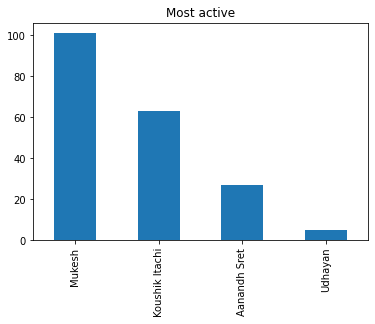

In [ ]:
#Most active
Toppers = df['Author'].value_counts()
Toppers.plot(kind='bar')
plt.title("Most active")

In [ ]:
MediaValues = df[df['Message'] == '<Media omitted>']
MediaValues

,Date,Time,Author,Message,urlcount
67,2022-12-28,20:33,Mukesh,<Media omitted>,0
76,2022-12-28,20:36,Mukesh,<Media omitted>,0
169,2023-01-01,11:55,Mukesh,<Media omitted>,0


Text(0.5, 1.0, 'Most media sent')

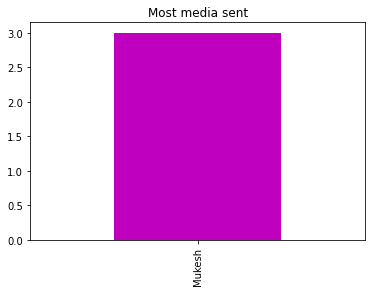

In [ ]:
#most media sent
MediaTopper = MediaValues['Author'].value_counts()
MediaTopper.plot(kind='bar', color='m')
plt.title("Most media sent")

Text(0.5, 1.0, 'Most Active Days')

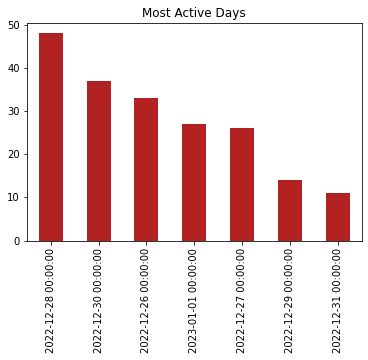

In [ ]:
#most active days
TopDate = df['Date'].value_counts().head(50)
TopDate.plot(kind='bar', color='firebrick')
plt.title("Most Active Days")

Text(0.5, 1.0, 'Most Active Hours')

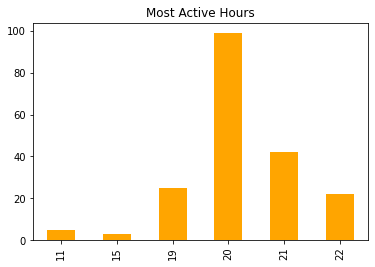

In [ ]:
#active hours
df['Hour'] = df['Time'].apply(lambda a : a.split(':')[0])
TopHours = df['Hour'].value_counts()
TopHours = TopHours.sort_index()
TopHours.plot(kind='bar', color='orange')
plt.title("Most Active Hours")

In [ ]:
df = df.drop(MediaValues.index)
df['Letters'] = df['Message'].apply(lambda s : len(s))
df['WordCount'] = df['Message'].apply(lambda s : len(s.split(" ")))

In [ ]:
GroupedData = df.groupby(['Author']).sum()
LetterGroupedData = GroupedData.sort_values(by=['Letters'])
WordGroupedData = GroupedData.sort_values(by=['WordCount'])

In [ ]:
df1=GroupedData.drop(['urlcount'], axis=1)

In [ ]:
df1

,Letters,WordCount
Author,,
Aanandh Sret,440,88
Koushik Itachi,1848,368
Mukesh,3799,732
Udhayan,157,37


In [ ]:
import plotly.graph_objects as go
author=df['Author']

fig = go.Figure(data=[
    go.Bar(name='WordCount', x=author, y=df['WordCount']),
    go.Bar(name='Letters', x=author, y=df['Letters'])
   
])
# Change the bar mode
fig.update_layout(barmode='group',title={
        'text': "Analysis of Letters & Wordcount",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center'})
fig.show()



In [ ]:
#Extracting Emojis
import emoji
import regex

def split_count(text):

    emoji_list = []
    data = regex.findall(r'\X', text)
    for word in data:
        if any(char in emoji.distinct_emoji_list(text)['en'] for char in word):
            emoji_list.append(word)
    
    return emoji_list
line_list = df['Message']
new_line_list = []
emojis=[]

for word in line_list:
  #print(word)
  emojis.extend(emoji.distinct_emoji_list(word))
  #print(emojis)
  new_line_list.extend([emoji.demojize(is_emoji) for is_emoji in emojis])
  new_line_list

In [ ]:
line_list = df['Message']
new_line_list = []
emojis=[]

for word in line_list:
  #print(word)
  emojis.extend(emoji.distinct_emoji_list(word))
  #print(emojis)
  new_line_list.extend([emoji.demojize(is_emoji) for is_emoji in emojis])

In [ ]:
new_line_list

[':collision:',
 ':collision:',
 ':collision:',
 ':collision:',
 ':face_with_tears_of_joy:',
 ':collision:',
 ':face_with_tears_of_joy:',
 ':face_with_tears_of_joy:',
 ':collision:',
 ':face_with_tears_of_joy:',
 ':face_with_tears_of_joy:',
 ':collision:',
 ':face_with_tears_of_joy:',
 ':face_with_tears_of_joy:',
 ':collision:',
 ':face_with_tears_of_joy:',
 ':face_with_tears_of_joy:',
 ':high_voltage:',
 ':collision:',
 ':face_with_tears_of_joy:',
 ':face_with_tears_of_joy:',
 ':high_voltage:',
 ':collision:',
 ':face_with_tears_of_joy:',
 ':face_with_tears_of_joy:',
 ':high_voltage:',
 ':collision:',
 ':face_with_tears_of_joy:',
 ':face_with_tears_of_joy:',
 ':high_voltage:',
 ':flexed_biceps:',
 ':collision:',
 ':face_with_tears_of_joy:',
 ':face_with_tears_of_joy:',
 ':high_voltage:',
 ':flexed_biceps:',
 ':collision:',
 ':face_with_tears_of_joy:',
 ':face_with_tears_of_joy:',
 ':high_voltage:',
 ':flexed_biceps:',
 ':collision:',
 ':face_with_tears_of_joy:',
 ':face_with_tears_of_

In [ ]:
emojis

['💥',
 '😂',
 '😂',
 '⚡',
 '💪',
 '👍🏻',
 '💯',
 '👍',
 '❤️\u200d🔥',
 '❤️\u200d🔥',
 '😂',
 '🤦\u200d♂️',
 '🤔',
 '🔥',
 '💪',
 '🔥',
 '💥',
 '💥',
 '💪',
 '🔥',
 '🤔',
 '😂',
 '💪',
 '💥',
 '😂',
 '🤦\u200d♂️',
 '😶',
 '🤔',
 '💥',
 '🔥',
 '😂',
 '😢',
 '😩',
 '😂',
 '😂',
 '😂',
 '💥',
 '🔥',
 '😅',
 '🤔',
 '🔥',
 '💥',
 '😂',
 '💪',
 '🔥',
 '🤧',
 '🔥',
 '💥',
 '🔥',
 '❤️\u200d🔥',
 '⚡',
 '🥳',
 '👍🏼',
 '🔥',
 '💯',
 '👍',
 '💯',
 '🔥',
 '🔥',
 '💥',
 '🔥',
 '🥳',
 '💯',
 '🔥',
 '💥',
 '🔥',
 '💥',
 '🤨',
 '😩',
 '😭',
 '🤔',
 '🔥',
 '💥',
 '🤧',
 '🔥',
 '✨',
 '💥',
 '💥',
 '🥵',
 '⚡',
 '🥳',
 '💥',
 '🔥',
 '🤧']

In [ ]:
emoji=len(emojis)

In [ ]:
b=[]
for i in emojis:
    # Add to the new list
    # only if not present
    if i not in b:
        b.append(i)

print(b)

['💥', '😂', '⚡', '💪', '👍🏻', '💯', '👍', '❤️\u200d🔥', '🤦\u200d♂️', '🤔', '🔥', '😶', '😢', '😩', '😅', '🤧', '🥳', '👍🏼', '🤨', '😭', '✨', '🥵']


In [ ]:
d=[]
for i in new_line_list:
    # Add to the new list
    # only if not present
    if i not in d:
        d.append(i)

print(d)

[':collision:', ':face_with_tears_of_joy:', ':high_voltage:', ':flexed_biceps:', ':thumbs_up_light_skin_tone:', ':hundred_points:', ':thumbs_up:', ':heart_on_fire:', ':man_facepalming:', ':thinking_face:', ':fire:', ':face_without_mouth:', ':crying_face:', ':weary_face:', ':grinning_face_with_sweat:', ':sneezing_face:', ':partying_face:', ':thumbs_up_medium-light_skin_tone:', ':face_with_raised_eyebrow:', ':loudly_crying_face:', ':sparkles:', ':hot_face:']


In [ ]:
len(b)

22

In [ ]:
len(d)

22

In [ ]:
from collections import Counter
count = Counter(emoji for string in emojis for emoji in string)

print(count)


Counter({'🔥': 21, '💥': 15, '😂': 10, '💪': 5, '️': 5, '\u200d': 5, '🤔': 5, '👍': 4, '💯': 4, '⚡': 3, '❤': 3, '🤧': 3, '🥳': 3, '🤦': 2, '♂': 2, '😩': 2, '🏻': 1, '😶': 1, '😢': 1, '😅': 1, '🏼': 1, '🤨': 1, '😭': 1, '✨': 1, '🥵': 1})


In [ ]:
!pip install urlextract

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
users = df['Author'].value_counts().index[:10]
users
values = df['Author'].value_counts().values[:10]
values

array([98, 63, 27,  5])

In [ ]:
URLPATTERN = r'(?:(?:https?|ftp):\/\/)?[\w/\-?=%.]+\.[\w/\-&?=%.]+'
df['Url_Count'] = df.Message.apply(lambda x: re.findall(URLPATTERN, x)).str.len()
links = np.sum(df.Url_Count)
#https://youtu.be/Uo3JhzD5Vcs

In [ ]:
links

12

In [ ]:
print('Total Number of Links : {}'.format(links))

Total Number of Links : 12


In [ ]:


print("Chats between Ananth , Mukesh and Koushik")
print("Total Messages: ", total_messages)
print("Number of Media Shared: ", media_messages)
print("Number of Emojis Shared", emoji)
print("Number of Links Shared", links)

Chats between Ananth , Mukesh and Koushik
Total Messages:  196
Number of Media Shared:  3
Number of Emojis Shared 84
Number of Links Shared 12


In [ ]:
emo = pd.Series(emojis)
TopEmoji = emo.value_counts().head()
TopEmoji

🔥    18
💥    15
😂    10
🤔     5
💪     5
dtype: int64

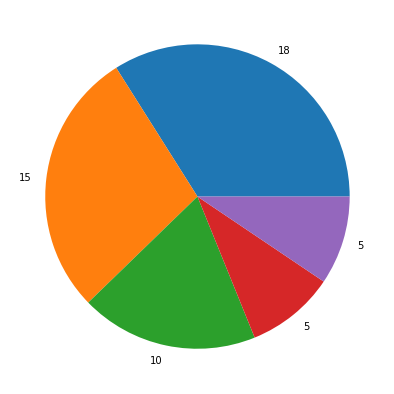

In [ ]:
# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.pie(TopEmoji,labels=TopEmoji)
 
# show plot
plt.show()

In [ ]:

from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:

temp = df[df['Author']!= 'Group Notification']
temp = temp[temp['Message']!='']


In [ ]:
words = []
for message in temp['Message']:
  for word in message.lower().split():
    if word not in stop_words:
      words.extend(message.split())

In [ ]:
from collections import Counter
most_common_df = pd.DataFrame(Counter(words).most_common(10))

In [ ]:
most_common_df.columns =['Word', 'Count']

In [ ]:

most_common_df

,Word,Count
0,for,212
1,the,160
2,in,160
3,he,131
4,a,100
5,think,100
6,will,100
7,have,84
8,I,77
9,to,72


Text(0.5, 1.0, 'Most Used Word')

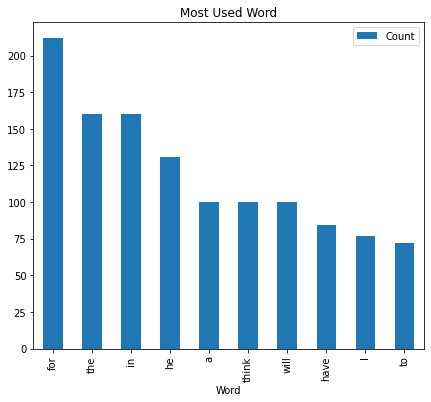

In [ ]:
most_common_df.plot(x="Word", y="Count", kind="bar", figsize=(7, 6))
plt.title("Most Used Word")

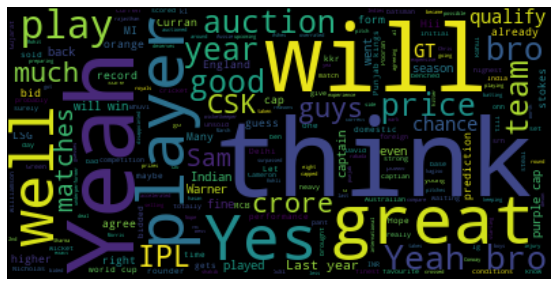

In [ ]:
text = " ".join(review for review in df.Message)
wordcloud = WordCloud(stopwords=STOPWORDS, background_color="black").generate(text)
  ### Display the generated image:
plt.figure( figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
import seaborn as sns
import plotly.express as px
z = df['Date'].value_counts() 
z1 = z.to_dict() #converts to dictionary
df['Msg_count'] = df['Date'].map(z1)
### Timeseries plot 
sns.set_style("darkgrid")
fig = px.line(x=df['Date'],y=df['Msg_count'])
fig.update_layout(title='Analysis of number of message',xaxis_title='Month', yaxis_title='No. of Messages')
fig.update_xaxes(nticks=20)
fig.show()

In [ ]:

import emoji
emojis = []
for message in df['Message']:
  emojis.extend([e for e in message if e in emoji.UNICODE_EMOJI['en']])

In [ ]:
emojis

['💥',
 '😂',
 '😂',
 '😂',
 '⚡',
 '⚡',
 '💪',
 '👍',
 '🏻',
 '👍',
 '💯',
 '❤',
 '🔥',
 '❤',
 '🔥',
 '❤',
 '🔥',
 '❤',
 '🔥',
 '😂',
 '🤦',
 '♂',
 '🤔',
 '🤔',
 '💪',
 '🔥',
 '💥',
 '🔥',
 '🔥',
 '💥',
 '💪',
 '🔥',
 '🔥',
 '🤔',
 '🤔',
 '😂',
 '💪',
 '💥',
 '😂',
 '🤦',
 '♂',
 '😶',
 '🤔',
 '💥',
 '🔥',
 '😂',
 '😢',
 '😩',
 '😂',
 '😂',
 '😂',
 '😂',
 '💥',
 '🔥',
 '🤔',
 '😅',
 '💥',
 '🔥',
 '😂',
 '💪',
 '🔥',
 '🔥',
 '🤧',
 '🔥',
 '🔥',
 '💥',
 '💥',
 '🔥',
 '🔥',
 '❤',
 '🔥',
 '❤',
 '🔥',
 '⚡',
 '⚡',
 '🥳',
 '🥳',
 '👍',
 '🏼',
 '🔥',
 '👍',
 '💯',
 '🔥',
 '💯',
 '💯',
 '💥',
 '🔥',
 '🔥',
 '🥳',
 '💥',
 '🔥',
 '💯',
 '💥',
 '🔥',
 '🤨',
 '😩',
 '😭',
 '🤔',
 '🔥',
 '💥',
 '🤧',
 '🔥',
 '🔥',
 '✨',
 '💥',
 '💥',
 '💥',
 '🥵',
 '🥵',
 '⚡',
 '⚡',
 '💥',
 '🥳',
 '🔥',
 '🤧']

In [ ]:
emoji_df = pd.DataFrame(Counter(emojis).most_common(len(Counter(emojis))), columns=['emojis','count'])
emoji_df.head(10)

,emojis,count
0,🔥,30
1,💥,17
2,😂,12
3,🤔,7
4,⚡,6
5,❤,6
6,💪,5
7,💯,5
8,👍,4
9,🥳,4


In [ ]:
emoji_df['emojis']

0     🔥
1     💥
2     😂
3     🤔
4     ⚡
5     ❤
6     💪
7     💯
8     👍
9     🥳
10    🤧
11    🤦
12    ♂
13    😩
14    🥵
15    🏻
16    😶
17    😢
18    😅
19    🏼
20    🤨
21    😭
22    ✨
Name: emojis, dtype: object

Text(0.5, 1.0, 'Most Used Emoji')

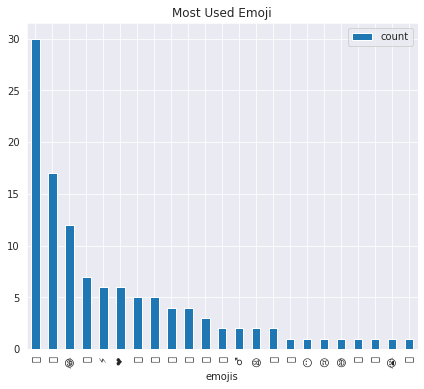

In [ ]:
emoji_df.plot(x="emojis", y="count", kind="bar", figsize=(7, 6))
plt.title("Most Used Emoji")

In [ ]:
mykeys = count.keys()
mylist = list(mykeys)

In [ ]:
mylist

['💥',
 '😂',
 '⚡',
 '💪',
 '👍',
 '🏻',
 '💯',
 '❤',
 '️',
 '\u200d',
 '🔥',
 '🤦',
 '♂',
 '🤔',
 '😶',
 '😢',
 '😩',
 '😅',
 '🤧',
 '🥳',
 '🏼',
 '🤨',
 '😭',
 '✨',
 '🥵']

In [ ]:
myvalues = count.values()
mylist2 = list(myvalues)

In [ ]:
de = pd.DataFrame(emojis)


In [ ]:
!pip install imojify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.1/142.1 MB 5.8 MB/s eta 0:00:00


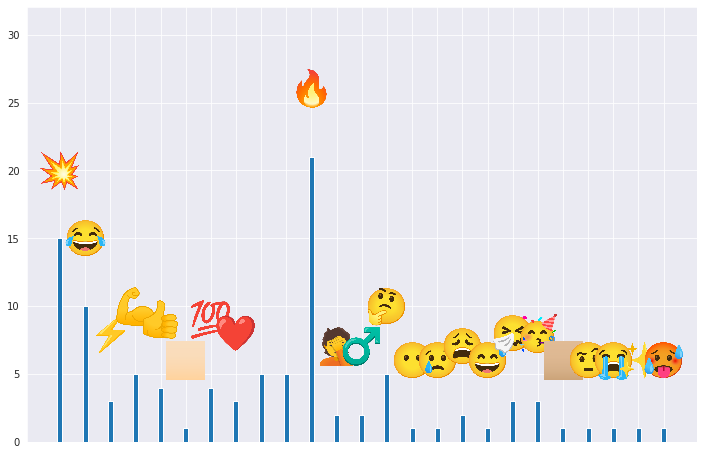

In [ ]:
from imojify import imojify
from matplotlib import pyplot as plt 
from matplotlib.offsetbox import OffsetImage,AnnotationBbox
def offset_image(cords, emoji, ax):
    img = plt.imread(imojify.get_img_path(emoji))
    im = OffsetImage(img, zoom=0.08)
    im.image.axes = ax
    ab = AnnotationBbox(im, (cords[0], cords[1]),  frameon=False, pad=0)
    ax.add_artist(ab)



emjis = mylist
values = mylist2

fig, ax = plt.subplots(figsize=(12,8))
ax.bar(range(len(emjis)), values, width=0.2,align="center")
ax.set_xticks(range(len(emjis)))
ax.set_xticklabels([])
ax.tick_params(axis='x', which='major', pad=26)
ax.set_ylim((0, ax.get_ylim()[1]+10))

for i, e in enumerate(emjis):
    offset_image([i,values[i]+5], e, ax)

#Sentimental Analysis

In [ ]:
import nltk
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


True

In [ ]:
from nltk.corpus import brown


In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import re
import pandas as pd
import numpy as np
import emoji
from collections import Counter
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk

# Extract Time
def date_time(s):
    pattern = '^([0-9]+)(\/)([0-9]+)(\/)([0-9]+), ([0-9]+):([0-9]+)[ ]?(AM|PM|am|pm)? -'
    result = re.match(pattern, s)
    if result:
        return True
    return False

# Find Authors or Contacts
def find_author(s):
    s = s.split(":")
    if len(s)==2:
        return True
    else:
        return False

# Finding Messages
def getDatapoint(line):
    splitline = line.split(' - ')
    dateTime = splitline[0]
    date, time = dateTime.split(", ")
    message = " ".join(splitline[1:])
    if find_author(message):
        splitmessage = message.split(": ")
        author = splitmessage[0]
        message = " ".join(splitmessage[1:])
    else:
        author= None
    return date, time, author, message

In [ ]:
data = []
conversation = '/content/drive/MyDrive/Internship /IPL/chat/WhatsApp Chat with IPL.txt'
with open(conversation, encoding="utf-8") as fp:
    fp.readline()
    messageBuffer = []
    date, time, author = None, None, None
    while True:
        line = fp.readline()
        if not line:
            break
        line = line.strip()
        if date_time(line):
            if len(messageBuffer) > 0:
                data.append([date, time, author, ' '.join(messageBuffer)])
            messageBuffer.clear()
            date, time, author, message = getDatapoint(line)
            messageBuffer.append(message)
        else:
            messageBuffer.append(line)

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
senti_analyzer= SentimentIntensityAnalyzer()

In [ ]:
senti_df = df[['Author','Message']]
senti_df.head(10)

In [ ]:
senti_df['postive'] = [senti_analyzer.polarity_scores(i)['pos'] for i in df['Message']]
senti_df['negative'] = [senti_analyzer.polarity_scores(i)['neg'] for i in df['Message']]
senti_df['neutral'] = [senti_analyzer.polarity_scores(i)['neu'] for i in df['Message']]
senti_df.head(10)
     

In [ ]:
senti_df[senti_df['postive']==1.0]

In [ ]:
senti_df[senti_df['neutral']==1.0]

In [ ]:
t_pos = senti_df['postive'].sum()
t_neg = senti_df['negative'].sum()
t_neu = senti_df['neutral'].sum()

In [ ]:

def sentiment_score(pos, neg, neu):
  if (pos > neg) and (pos > neu):
    return 'Positive 😊'
  elif (neg > pos) and (neg > neu):
    return 'Negative 😠'
  else:
    return 'Neutral 🙂'
  
print(sentiment_score(t_pos, t_neg, t_neu))
  

In [ ]:
colors = ['#99ff99','#6495ED','#FF4040']
explode = (0.08,0.08,0.08)
data = [t_pos, t_neg, t_neu]
label = ['Positive','Negative','Neutral']

plt.pie(data, labels=label, autopct='%1.1f%%', explode=explode, shadow=True, colors=colors)

In [ ]:
data = [t_pos, t_neg]
label = ['Positive','Negative']
color = ['#77DD77','#FF6961']
plt.pie(data, labels=label, autopct='%1.1f%%', shadow=True, colors= color)

In [ ]:
df['Message'] =df['Message'].str.replace('\d+','') 
df['Message'] =df['Message'].str.replace('.','') 

def cleanTxt(text):
    text = re.sub('[^a-zA-Z]', ' ', str(text)) 
    text=re.sub(r'#','',str(text)) 
    text = re.sub('http[^\s]+','',str(text)) 
    text=re.sub(r'@[A-Za-z0-9]+','',str(text)) 
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  
                           u"\U0001F300-\U0001F5FF" 
                           u"\U0001F680-\U0001F6FF"  
                           u"\U0001F1E0-\U0001F1FF"  
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', str(text))

df['Message']=df['Message'].apply(cleanTxt) 

def sentiment_scores(sentence):
    s=TextBlob(sentence) 
    sentiment_dict = s.sentiment.polarity 
    if sentiment_dict>0 and sentiment_dict<=1:
        return "positive"
    elif sentiment_dict<0 :
        return "negative"
    elif sentiment_dict==0 :
        return "neutral"

l=[sentiment_scores(i) for i in df.Message]
df["labels"] = l



In [ ]:
from wordcloud import WordCloud,STOPWORDS

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
mask = (df['Date'] > '2022-12-25') & (df['Date'] <= '2023-01-02')
g=df.loc[mask]

comment_words = ''
stopwords = set(STOPWORDS)
n=g[g['labels']=='positive']
for val in n['Message']:
    val = str(val)
    tokens = val.split()
    for i in range(len(tokens)):
        if tokens[i] == 'JJ' or tokens[i]=='JJR' or tokens[i]=='JJS':
            tokens[i] = tokens[i].lower()
    comment_words += " ".join(tokens)+" "
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='black',
                stopwords = stopwords,
                colormap='Set2',
                min_font_size =10).generate(comment_words)
     
plt.show()

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
text = ' '.join([word for word in comment_words.split() if word not in (stopwords.words('english'))])

In [ ]:
nltk.download('words')
words=set(nltk.corpus.words.words())
text= " ".join(w for w in nltk.wordpunct_tokenize(text) if w.lower() in words or not w.isalpha())

In [ ]:
words=text.split()
len(words)

In [ ]:
word=[]
for i in range(234):
    word.append(words[i])

In [ ]:
for i in range(len(word)):
    word[i] = word[i].lower()

In [ ]:
word=np.array(word)
(unique,count)=np.unique(word,return_counts=True)
data_word=pd.DataFrame({'words':unique,'frequency':count})
df2=data_word.sort_values('frequency',ascending=False)

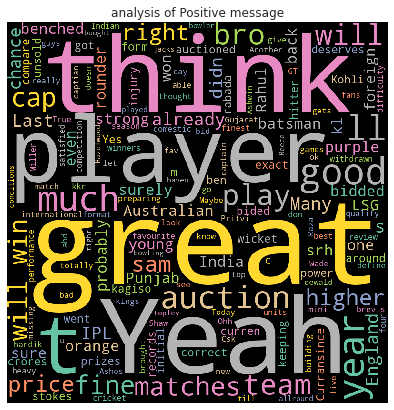

In [ ]:
fig,(ax1)=plt.subplots(nrows=1,figsize=(20,7))

ax1.imshow(wordcloud,interpolation="none")
ax1.set_title('analysis of Positive message')

ax1.axis('off')

plt.show()

In [ ]:
df1=df.drop(['urlcount','Url_Count'], axis=1)

In [ ]:
df1

,Date,Time,Author,Message,Hour,Letters,WordCount,Msg_count,labels
0,2022-12-26,19:45,Mukesh,Hii guys,19,8,2,33,neutral
1,2022-12-26,19:46,Koushik Itachi,Hii boys,19,8,2,33,neutral
2,2022-12-26,19:46,Aanandh Sret,Hii guys,19,8,2,33,neutral
3,2022-12-26,19:46,Mukesh,How are you all,19,16,4,33,neutral
4,2022-12-26,19:46,Aanandh Sret,I m great,19,9,2,33,positive
...,...,...,...,...,...,...,...,...,...
191,2023-01-01,22:38,Mukesh,and also a very good batsman for back up Will ...,22,52,11,26,positive
192,2023-01-01,22:38,Mukesh,yeah but i think most probably he ll play till...,22,64,12,26,positive
193,2023-01-01,22:39,Mukesh,Hope he does will till then,22,27,6,26,neutral
194,2023-01-01,22:39,Koushik Itachi,Yeah,22,4,1,26,neutral


In [ ]:
df['Date']=pd.to_datetime(df['Date'])

In [ ]:
df['Week']=df['Date'].dt.to_period('W').astype(str)

In [ ]:
df

,Date,Time,Author,Message,urlcount,Hour,Letters,WordCount,Url_Count,Msg_count,labels,Week
0,2022-12-26,19:45,Mukesh,Hii guys,0,19,8,2,0,33,neutral,2022-12-26/2023-01-01
1,2022-12-26,19:46,Koushik Itachi,Hii boys,0,19,8,2,0,33,neutral,2022-12-26/2023-01-01
2,2022-12-26,19:46,Aanandh Sret,Hii guys,0,19,8,2,0,33,neutral,2022-12-26/2023-01-01
3,2022-12-26,19:46,Mukesh,How are you all,0,19,16,4,0,33,neutral,2022-12-26/2023-01-01
4,2022-12-26,19:46,Aanandh Sret,I m great,0,19,9,2,0,33,positive,2022-12-26/2023-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...
191,2023-01-01,22:38,Mukesh,and also a very good batsman for back up Will ...,0,22,52,11,0,26,positive,2022-12-26/2023-01-01
192,2023-01-01,22:38,Mukesh,yeah but i think most probably he ll play till...,0,22,64,12,0,26,positive,2022-12-26/2023-01-01
193,2023-01-01,22:39,Mukesh,Hope he does will till then,0,22,27,6,0,26,neutral,2022-12-26/2023-01-01
194,2023-01-01,22:39,Koushik Itachi,Yeah,0,22,4,1,0,26,neutral,2022-12-26/2023-01-01


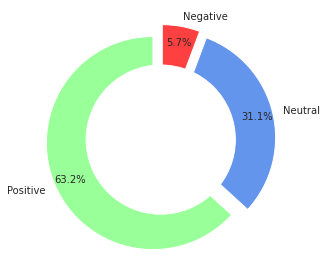

In [ ]:
#colors = ['#99ff99','#6495ED','#FF4040']
#explode = (0.08,0.08,0.08)
 
plt.pie(df.labels.value_counts(),colors = colors, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode,labels=['Positive','Neutral','Negative'])
centre_circle = plt.Circle((0,0),0.70,fc='white') #plt.circle plots the graph in circle
fig = plt.gcf() #get current figure
fig.gca().add_artist(centre_circle) 
plt.tight_layout()
plt.show()